In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [ ]:
X = digits.data
Y = digits.target

print(X, len(X))
print(Y, len(Y))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 1797
[0 1 2 ... 8 9 8] 1797


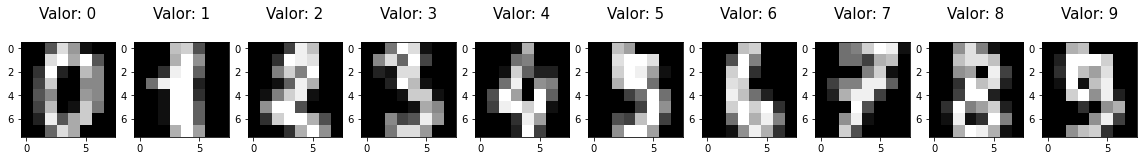

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))

inicial = 0

for index, (imagen, etiqueta) in enumerate(zip(X[inicial:inicial+10], Y[inicial:inicial+10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(imagen, (8,8)), cmap=plt.cm.gray)
 plt.title('Valor: %i\n' % etiqueta, fontsize = 15)

## Clasificación con Entropía Cruzada (Regresión Logística)

Debido a que con este método sólo se pueden hacer clasificaciones binarias, debemos elegir sólo dos clases de todo el dataset

In [ ]:
# Escoger aleatoriamente las clases
digitos = np.random.randint(10, size=2)
if digitos[0]==digitos[1]:
  digitos = np.random.randint(10, size=2)
print(digitos)

[6 3]


In [ ]:
# De los datos en Y, se extraerán las posiciones de las clases que nos interesan
posiciones = np.where((Y == digitos[0]) | (Y == digitos[1]))

In [ ]:
# Se quitan todas las filas que no nos interesan
X = X[posiciones[0]]
Y = Y[posiciones[0]]

In [ ]:
X

array([[ 0.,  0.,  7., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ..., 11.,  3.,  0.],
       [ 0.,  2.,  9., ..., 11.,  0.,  0.],
       ...,
       [ 0.,  2., 10., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  5.,  0.],
       [ 0.,  0.,  2., ..., 14.,  4.,  0.]])

In [ ]:
Y

array([3, 6, 3, 6, 3, 6, 6, 3, 6, 3, 3, 3, 3, 6, 6, 6, 6, 3, 6, 3, 3, 6,
       3, 3, 6, 6, 3, 6, 3, 6, 3, 6, 6, 3, 6, 3, 3, 3, 3, 6, 6, 6, 6, 3,
       3, 3, 6, 3, 3, 6, 6, 3, 6, 3, 6, 3, 6, 6, 3, 6, 3, 3, 3, 3, 6, 6,
       6, 6, 3, 6, 3, 3, 6, 3, 3, 6, 6, 3, 3, 6, 3, 6, 3, 6, 6, 3, 6, 3,
       3, 3, 3, 6, 6, 6, 6, 3, 6, 3, 3, 6, 3, 3, 6, 6, 3, 6, 3, 6, 3, 6,
       6, 3, 6, 3, 3, 3, 3, 6, 6, 6, 6, 3, 6, 3, 3, 6, 3, 3, 6, 6, 3, 6,
       3, 6, 3, 6, 6, 3, 6, 3, 3, 3, 3, 6, 6, 6, 6, 3, 6, 3, 3, 6, 3, 3,
       6, 6, 3, 6, 3, 6, 3, 6, 6, 3, 6, 3, 3, 3, 3, 6, 6, 6, 6, 3, 6, 3,
       3, 6, 3, 3, 6, 6, 3, 6, 3, 6, 3, 6, 6, 3, 6, 3, 3, 3, 3, 6, 6, 6,
       6, 3, 6, 3, 3, 6, 3, 3, 6, 6, 3, 6, 3, 6, 3, 6, 6, 3, 6, 3, 3, 3,
       3, 6, 6, 6, 6, 3, 6, 3, 3, 6, 3, 3, 6, 6, 3, 6, 3, 6, 3, 6, 6, 3,
       6, 3, 3, 3, 3, 6, 6, 6, 6, 3, 6, 3, 3, 6, 3, 3, 6, 6, 3, 6, 3, 6,
       3, 6, 6, 3, 6, 3, 3, 3, 3, 6, 6, 6, 6, 3, 6, 3, 3, 6, 3, 3, 6, 6,
       3, 6, 3, 6, 3, 6, 6, 3, 6, 3, 3, 3, 3, 6, 6,

### Acondicionar los arreglos

In [ ]:
# Se agrega una columna vacía a la derecha de Y, para poder hacer la resta
Y = np.expand_dims(Y, 1)
print(Y.shape)

(364, 1)


In [ ]:
print(X.shape)

(364, 64)


### Cambiar Etiquetas de Y

In [ ]:
# Cambiar los valores de las clases a 0 y 1 respectivamente
posiciones = np.where(Y == digitos[0])
Y[posiciones] = 0
posiciones = np.where(Y == digitos[1])
Y[posiciones] = 1

In [ ]:
print(Y.shape)

(364, 1)


### Función Gradiente Descendente

In [ ]:
import random

# Función para Entrenar
def Gradiente_Sigmoide(X, Y, alpha, iteraciones):
  n = np.shape(X)
  p = np.shape(n)
  if p[0]==1:
    n = 1
  else:
    n = n[1]
  # Generar números aleatorios para las thetas dependiendo de la cantidad de variables en X
  thetas = np.random.rand(n+1, 1)

  # Añadir columna de 1's a la matriz X
  X = np.insert(X, 0, 1, axis=1)

  for m in range(iteraciones):
    # Multiplicar X.0
    z = np.dot(X, thetas)
    # Función Sigmoide
    h = 1.0 / (1.0 + np.exp(-z))################
    # Restar X.0 - Y
    h_Y = h - Y
    # Multiplicar (X.0 - Y) * X.T
    j_0 = X.T @ h_Y
    # Multiplicar alpha/m * j_0
    mult = (alpha/len(Y)) * j_0
    # Restar a thetas - mult
    thetas = thetas - mult
  return thetas

# Entrenar y Evaluar el Modelo aplicando la regla de 60-20-20

#### Primero se dividen los datos

In [ ]:
# Calculamos los datos necesarios para dividir nuestros datos
entrenamiento = np.round(len(X) * 0.6).astype('int')
validacion = np.round(len(X) * .2).astype('int')
test = np.round(len(X) * .2).astype('int')

print('Conjunto entrenamiento: ', entrenamiento, '\n', 'Conjunto Validación', validacion, '\n', 'Conjunto Test: ', test)

Conjunto entrenamiento:  218 
 Conjunto Validación 73 
 Conjunto Test:  73


In [ ]:
# Separamos los datos
# Conjunto Entrenamiento
X_ent = X[0:entrenamiento]
Y_ent = Y[0:entrenamiento]
# Conjunto Validación
X_val = X[entrenamiento:entrenamiento + validacion]
Y_val = Y[entrenamiento:entrenamiento + validacion]
# Conjunto Test
X_test = X[validacion:validacion + test]
Y_test = Y[validacion:validacion + test]

print('X_ent :', X_ent.shape, 'X_val: ', X_val.shape, 'X_test: ', X_test.shape)

X_ent : (218, 64) X_val:  (73, 64) X_test:  (73, 64)


#### Entrenamos el modelo

In [ ]:
thetas_new = Gradiente_Sigmoide(X_ent,Y_ent,0.01,100)
print(thetas_new.shape)

(65, 1)


#### Evaluamos con el mismo conjunto de entrenamiento

In [ ]:
# Agregamos columna de 1's al conjunto de entrenamiento
X_ent_n = np.insert(X_ent, 0, 1, axis=1)

# Evaluación
z_ent = X_ent_n @ thetas_new
eva_ent = 1/(1 + np.exp(-z_ent))

In [ ]:
# Convertimos a 0 los valores menores a 0.5 y a 1 los mayores
for m in range(len(eva_ent)):
  if eva_ent[m]<=0.5:
    eva_ent[m] = 0
  else:
    eva_ent[m] = 1
print(len(eva_ent))

218


In [ ]:
# Calculamos los errores
correctos = 0
falsos = 0

for m in range(len(Y_ent)):
  if Y_ent[m]==eva_ent[m]:
    correctos += 1
  else:
    falsos += 1
print('El número de respuestas correctas fue: ', correctos, '\n', 'Las respuestas incorrectas fueron: ', falsos)

El número de respuestas correctas fue:  218 
 Las respuestas incorrectas fueron:  0


In [ ]:
# Calculamos el accuracy
accuracy = (correctos/len(Y_ent)) * 100
print('El accuracy para el entrenamiento fue de {} %'.format(accuracy))

El accuracy para el entrenamiento fue de 100.0 %


#### Evaluamos con el conjunto de validación

In [ ]:
# Agregamos columna de 1's al conjunto de validación
X_val_n = np.insert(X_val, 0, 1, axis=1)

# Evaluación
z_val = X_val_n @ thetas_new
eva_val = 1/(1 + np.exp(-z_val))

In [ ]:
# Convertimos a 0 los valores menores a 0.5 y a 1 los mayores
for m in range(len(eva_val)):
  if eva_val[m]<=0.5:
    eva_val[m] = 0
  else:
    eva_val[m] = 1
print(len(eva_val))

73


In [ ]:
# Calculamos los errores
correctos_val = 0
falsos_val = 0

for m in range(len(Y_val)):
  if Y_val[m]==eva_val[m]:
    correctos_val += 1
  else:
    falsos_val += 1
print('El número de respuestas correctas fue: ', correctos_val, '\n', 'Las respuestas incorrectas fueron: ', falsos_val)

El número de respuestas correctas fue:  73 
 Las respuestas incorrectas fueron:  0


In [ ]:
# Calculamos el accuracy
accuracy_val = (correctos_val/len(Y_val)) * 100
print('El accuracy para el conjunto de validación fue de {} %'.format(accuracy_val))

El accuracy para el conjunto de validación fue de 100.0 %


#### Evaluamos con el conjunto de test

In [ ]:
# Agregamos columna de 1's al conjunto de test
X_test_n = np.insert(X_test, 0, 1, axis=1)

# Evaluación
z_test = X_test_n @ thetas_new
eva_test = 1/(1 + np.exp(-z_test))

In [ ]:
# Convertimos a 0 los valores menores a 0.5 y a 1 los mayores
for m in range(len(eva_test)):
  if eva_test[m]<=0.5:
    eva_test[m] = 0
  else:
    eva_test[m] = 1
print(len(eva_test))

73


In [ ]:
# Calculamos los errores
correctos_test = 0
falsos_test = 0

for m in range(len(Y_test)):
  if Y_test[m]==eva_test[m]:
    correctos_test += 1
  else:
    falsos_test += 1
print('El número de respuestas correctas fue: ', correctos_test, '\n', 'Las respuestas incorrectas fueron: ', falsos_test)

El número de respuestas correctas fue:  73 
 Las respuestas incorrectas fueron:  0


In [ ]:
# Calculamos el accuracy
accuracy_test = (correctos_test/len(Y_test)) * 100
print('El accuracy para el conjunto test fue de {} %'.format(accuracy_test))

El accuracy para el conjunto test fue de 100.0 %


# Entrenar y evaluar el modelo aplicando K Fold

In [ ]:
# Se dividirá X y Y en cuatro conjuntos
elementos = round(len(X)/4)
X1 = X[0:elementos]
X2 = X[elementos:elementos*2]
X3 = X[elementos*2:elementos*3]
X4 = X[elementos*3:len(X)+1]
Y1 = Y[0:elementos]
Y2 = Y[elementos:elementos*2]
Y3 = Y[elementos*2:elementos*3]
Y4 = Y[elementos*3:len(X)+1]
print(X1.shape, X2.shape, X3.shape, X4.shape)

(91, 64) (91, 64) (91, 64) (91, 64)


#### Se crean los conjuntos de entrenamiento

In [ ]:
# Primer grupo de entrenamiento
X_ent1 = np.concatenate((X2,X3,X4))
Y_ent1 = np.concatenate((Y2,Y3,Y4))
# Segundo grupo de entrenamiento
X_ent2 = np.concatenate((X1,X3,X4))
Y_ent2 = np.concatenate((Y1,Y3,Y4))
# Tercer grupo de entrenamiento
X_ent3 = np.concatenate((X1,X2,X4))
Y_ent3 = np.concatenate((Y1,Y2,Y4))
# Cuarto grupo de entrenamiento
X_ent4 = np.concatenate((X1,X3,X3))
Y_ent4 = np.concatenate((Y1,Y3,Y3))

### Primer entrenamiento y evaluación

In [ ]:
thetas_K1 = Gradiente_Sigmoide(X_ent1,Y_ent1,0.01,100)
print(thetas_K1.shape)

(65, 1)


Evaluación con conjunto de entrenamiento

In [ ]:
# Agregamos columna de 1's al conjunto de entrenamiento
X_ent1 = np.insert(X_ent1, 0, 1, axis=1)

# Evaluación
z_ent1 = X_ent1 @ thetas_K1
eva_ent1 = 1/(1 + np.exp(-z_ent1))

# Convertimos a 0 los valores menores a 0.5 y a 1 los mayores
for m in range(len(eva_ent1)):
  if eva_ent1[m]<=0.5:
    eva_ent1[m] = 0
  else:
    eva_ent1[m] = 1

# Calculamos los errores
right_ent1 = 0
wrong_ent1 = 0

for m in range(len(Y_ent1)):
  if Y_ent1[m]==eva_ent1[m]:
    right_ent1 += 1
  else:
    wrong_ent1 += 1
print('El número de respuestas correctas para el conjunto de entrenamiento fue: ', right_ent1, '\n', 'Las respuestas incorrectas fueron: ', wrong_ent1)

# Calculamos el accuracy para el entrenamiento
accu_ent1 = (right_ent1/len(Y_ent1)) * 100
print('El accuracy para el entrenamiento fue de {} %'.format(accu_ent1))

El número de respuestas correctas para el conjunto de entrenamiento fue:  271 
 Las respuestas incorrectas fueron:  2
El accuracy para el entrenamiento fue de 99.26739926739927 %


Evaluación con conjunto de validación

In [ ]:
# Agregamos columna de 1's al conjunto de validación
X1 = np.insert(X1, 0, 1, axis=1)

# Evaluación
z1 = X1 @ thetas_K1
eva1 = 1/(1 + np.exp(-z1))

# Convertimos a 0 los valores menores a 0.5 y a 1 los mayores
for m in range(len(eva1)):
  if eva1[m]<=0.5:
    eva1[m] = 0
  else:
    eva1[m] = 1

# Calculamos los errores
right1 = 0
wrong1 = 0

for m in range(len(Y1)):
  if Y1[m]==eva1[m]:
    right1 += 1
  else:
    wrong1 += 1
print('El número de respuestas correctas para el conjunto de validación fue: ', right1, '\n', 'Las respuestas incorrectas fueron: ', wrong1)

# Calculamos el accuracy para el entrenamiento
accu1 = (right1/len(Y1)) * 100
print('El accuracy para el conjunto de validación fue de {} %'.format(accu1))

El número de respuestas correctas para el conjunto de validación fue:  90 
 Las respuestas incorrectas fueron:  1
El accuracy para el conjunto de validación fue de 98.9010989010989 %


## Segundo entrenamiento y evaluación

In [ ]:
thetas_K2 = Gradiente_Sigmoide(X_ent2,Y_ent2,0.01,100)
print(thetas_K2.shape)

(65, 1)


Evaluación con conjunto de entrenamiento

In [ ]:
# Agregamos columna de 1's al conjunto de entrenamiento
X_ent2 = np.insert(X_ent2, 0, 1, axis=1)

# Evaluación
z_ent2 = X_ent2 @ thetas_K2
eva_ent2 = 1/(1 + np.exp(-z_ent2))

# Convertimos a 0 los valores menores a 0.5 y a 1 los mayores
for m in range(len(eva_ent2)):
  if eva_ent2[m]<=0.5:
    eva_ent2[m] = 0
  else:
    eva_ent2[m] = 1

# Calculamos los errores
right_ent2 = 0
wrong_ent2 = 0

for m in range(len(Y_ent2)):
  if Y_ent2[m]==eva_ent2[m]:
    right_ent2 += 1
  else:
    wrong_ent2 += 1
print('El número de respuestas correctas para el conjunto de entrenamiento fue: ', right_ent2, '\n', 'Las respuestas incorrectas fueron: ', wrong_ent2)

# Calculamos el accuracy para el entrenamiento
accu_ent2 = (right_ent2/len(Y_ent2)) * 100
print('El accuracy para el entrenamiento fue de {} %'.format(accu_ent2))

El número de respuestas correctas para el conjunto de entrenamiento fue:  271 
 Las respuestas incorrectas fueron:  2
El accuracy para el entrenamiento fue de 99.26739926739927 %


Evaluación Conjunto de Validación

In [ ]:
# Agregamos columna de 1's al conjunto de validación
X2 = np.insert(X2, 0, 1, axis=1)

# Evaluación
z2 = X2 @ thetas_K2
eva2 = 1/(1 + np.exp(-z2))

# Convertimos a 0 los valores menores a 0.5 y a 1 los mayores
for m in range(len(eva2)):
  if eva2[m]<=0.5:
    eva2[m] = 0
  else:
    eva2[m] = 1

# Calculamos los errores
right2 = 0
wrong2 = 0

for m in range(len(Y2)):
  if Y2[m]==eva2[m]:
    right2 += 1
  else:
    wrong2 += 1
print('El número de respuestas correctas para el conjunto de validación fue: ', right2, '\n', 'Las respuestas incorrectas fueron: ', wrong2)

# Calculamos el accuracy para el entrenamiento
accu2 = (right2/len(Y2)) * 100
print('El accuracy para el conjunto de validación fue de {} %'.format(accu2))

El número de respuestas correctas para el conjunto de validación fue:  84 
 Las respuestas incorrectas fueron:  7
El accuracy para el conjunto de validación fue de 92.3076923076923 %


## Tercer entrenamiento y evaluación

In [ ]:
thetas_K3 = Gradiente_Sigmoide(X_ent3,Y_ent3,0.01,100)
print(thetas_K3.shape)

(65, 1)


In [ ]:
# Agregamos columna de 1's al conjunto de entrenamiento
X_ent3 = np.insert(X_ent3, 0, 1, axis=1)

# Evaluación
z_ent3 = X_ent3 @ thetas_K3
eva_ent3 = 1/(1 + np.exp(-z_ent3))

# Convertimos a 0 los valores menores a 0.5 y a 1 los mayores
for m in range(len(eva_ent3)):
  if eva_ent3[m]<=0.5:
    eva_ent3[m] = 0
  else:
    eva_ent3[m] = 1

# Calculamos los errores
right_ent3 = 0
wrong_ent3 = 0

for m in range(len(Y_ent3)):
  if Y_ent3[m]==eva_ent3[m]:
    right_ent3 += 1
  else:
    wrong_ent3 += 1
print('El número de respuestas correctas para el conjunto de entrenamiento fue: ', right_ent3, '\n', 'Las respuestas incorrectas fueron: ', wrong_ent3)

# Calculamos el accuracy para el entrenamiento
accu_ent3 = (right_ent3/len(Y_ent3)) * 100
print('El accuracy para el entrenamiento fue de {} %'.format(accu_ent3))

El número de respuestas correctas para el conjunto de entrenamiento fue:  267 
 Las respuestas incorrectas fueron:  6
El accuracy para el entrenamiento fue de 97.8021978021978 %


In [ ]:
# Agregamos columna de 1's al conjunto de validación
X3 = np.insert(X3, 0, 1, axis=1)

# Evaluación
z3 = X3 @ thetas_K3
eva3 = 1/(1 + np.exp(-z3))

# Convertimos a 0 los valores menores a 0.5 y a 1 los mayores
for m in range(len(eva3)):
  if eva3[m]<=0.5:
    eva3[m] = 0
  else:
    eva3[m] = 1

# Calculamos los errores
right3 = 0
wrong3 = 0

for m in range(len(Y3)):
  if Y3[m]==eva3[m]:
    right3 += 1
  else:
    wrong3 += 1
print('El número de respuestas correctas para el conjunto de validación fue: ', right3, '\n', 'Las respuestas incorrectas fueron: ', wrong3)

# Calculamos el accuracy para el entrenamiento
accu3 = (right3/len(Y3)) * 100
print('El accuracy para el conjunto de validación fue de {} %'.format(accu3))

El número de respuestas correctas para el conjunto de validación fue:  91 
 Las respuestas incorrectas fueron:  0
El accuracy para el conjunto de validación fue de 100.0 %


## Cuarto entrenamiento y evaluación

In [ ]:
thetas_K4 = Gradiente_Sigmoide(X_ent4,Y_ent4,0.01,100)
print(thetas_K4.shape)

(65, 1)


In [ ]:
# Agregamos columna de 1's al conjunto de entrenamiento
X_ent4 = np.insert(X_ent4, 0, 1, axis=1)

# Evaluación
z_ent4 = X_ent4 @ thetas_K4
eva_ent4 = 1/(1 + np.exp(-z_ent4))

# Convertimos a 0 los valores menores a 0.5 y a 1 los mayores
for m in range(len(eva_ent4)):
  if eva_ent4[m]<=0.5:
    eva_ent4[m] = 0
  else:
    eva_ent4[m] = 1

# Calculamos los errores
right_ent4 = 0
wrong_ent4 = 0

for m in range(len(Y_ent4)):
  if Y_ent4[m]==eva_ent4[m]:
    right_ent4 += 1
  else:
    wrong_ent4 += 1
print('El número de respuestas correctas para el conjunto de entrenamiento fue: ', right_ent4, '\n', 'Las respuestas incorrectas fueron: ', wrong_ent4)

# Calculamos el accuracy para el entrenamiento
accu_ent4 = (right_ent4/len(Y_ent4)) * 100
print('El accuracy para el entrenamiento fue de {} %'.format(accu_ent4))

El número de respuestas correctas para el conjunto de entrenamiento fue:  272 
 Las respuestas incorrectas fueron:  1
El accuracy para el entrenamiento fue de 99.63369963369964 %


In [ ]:
# Agregamos columna de 1's al conjunto de validación
X4 = np.insert(X4, 0, 1, axis=1)

# Evaluación
z4 = X4 @ thetas_K4
eva4 = 1/(1 + np.exp(-z4))

# Convertimos a 0 los valores menores a 0.5 y a 1 los mayores
for m in range(len(eva4)):
  if eva4[m]<=0.5:
    eva4[m] = 0
  else:
    eva4[m] = 1

# Calculamos los errores
right4 = 0
wrong4 = 0

for m in range(len(Y4)):
  if Y4[m]==eva4[m]:
    right4 += 1
  else:
    wrong4 += 1
print('El número de respuestas correctas para el conjunto de validación fue: ', right4, '\n', 'Las respuestas incorrectas fueron: ', wrong4)

# Calculamos el accuracy para el entrenamiento
accu4 = (right4/len(Y4)) * 100
print('El accuracy para el conjunto de validación fue de {} %'.format(accu4))

El número de respuestas correctas para el conjunto de validación fue:  89 
 Las respuestas incorrectas fueron:  2
El accuracy para el conjunto de validación fue de 97.8021978021978 %


#### Por último, se calcula la media de el accuracy de cada ronda

In [ ]:
Accuracy_Total = (accu1 +  accu2 + accu3 + accu4) / 4
print('El Accuracy Total es de {}'.format(Accuracy_Total))

El Accuracy Total es de 97.25274725274726
